In [4]:
# Merge the datasets
import pandas as pd

# Load the cleaned datasets
df_true = pd.read_csv("cleaned_True.csv")
df_fake = pd.read_csv("cleaned_False.csv")

# Add a label column: 1 for real, 0 for fake
df_true['label'] = 1
df_fake['label'] = 0

# Merge the datasets
df = pd.concat([df_true, df_fake], ignore_index=True)

# Save the merged dataset
df.to_csv("Merged_Dataset.csv", index=False)

print(df.head())
print(df.tail())

                                               title  \
0  u.s. budget fight looms, republican flip fisca...   
1  u.s. military accept transgender recruit monda...   
2  senior u.s. republican senator: 'let mr. muell...   
3  fbi russia probe helped australian diplomat ti...   
4  trump want postal service charge 'much more' a...   

                                                text       subject  \
0  washington (reuters) - head conservative repub...  politicsNews   
1  washington (reuters) - transgender people allo...  politicsNews   
2  washington (reuters) - special counsel investi...  politicsNews   
3  washington (reuters) - trump campaign adviser ...  politicsNews   
4  seattle washington (reuters) - president donal...  politicsNews   

         date  subject_encoded  label  
0  2017-12-31                0      1  
1  2017-12-29                0      1  
2  2017-12-31                0      1  
3  2017-12-30                0      1  
4  2017-12-29                0      1  
  

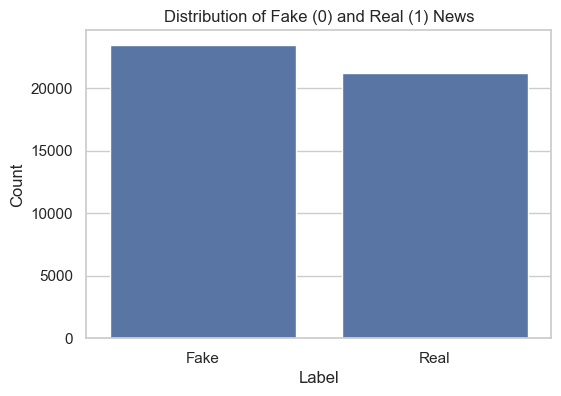

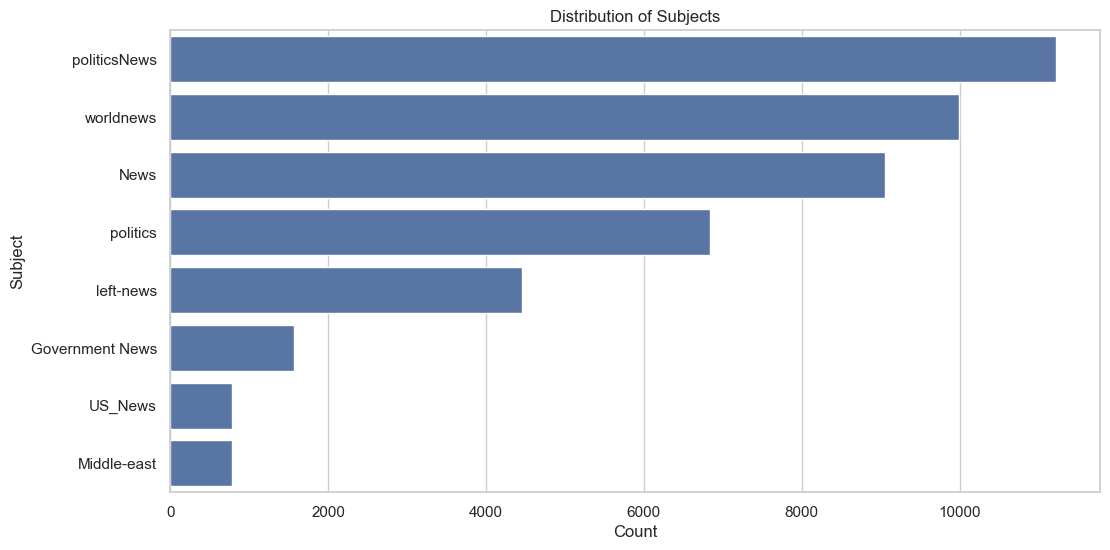

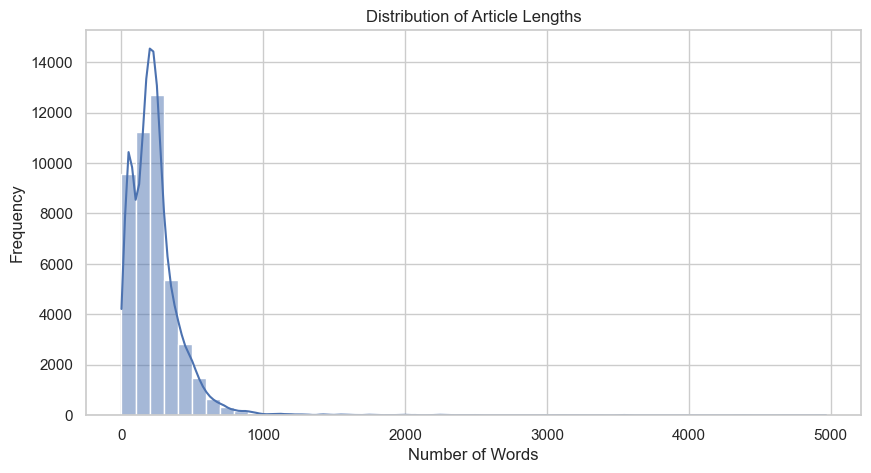

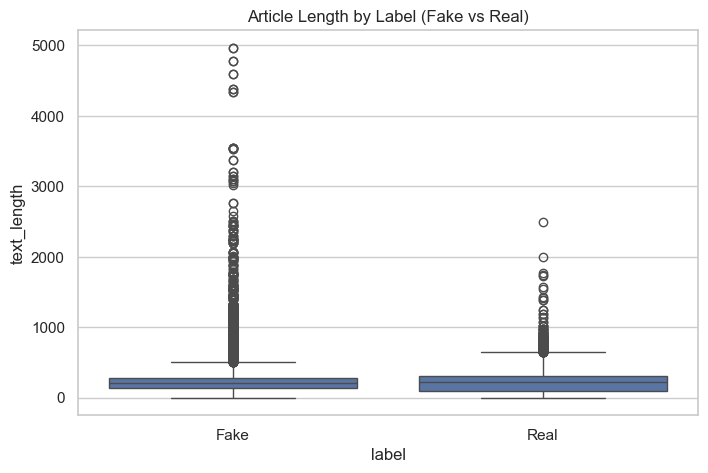

In [7]:
#Univariate Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load merged dataset
df = pd.read_csv("Merged_Dataset.csv")

# Set up general plot style
sns.set(style="whitegrid")

# 1. Label distribution (Fake vs Real)
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title("Distribution of Fake (0) and Real (1) News")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

# 2. Subject frequency
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='subject', order=df['subject'].value_counts().index)
plt.title("Distribution of Subjects")
plt.xlabel("Count")
plt.ylabel("Subject")
plt.show()

# 3. Article Length Distribution (text length)
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribution of Article Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# 4. Boxplot of Article Length by Label
plt.figure(figsize=(8,5))
sns.boxplot(x='label', y='text_length', data=df)
plt.title("Article Length by Label (Fake vs Real)")
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()


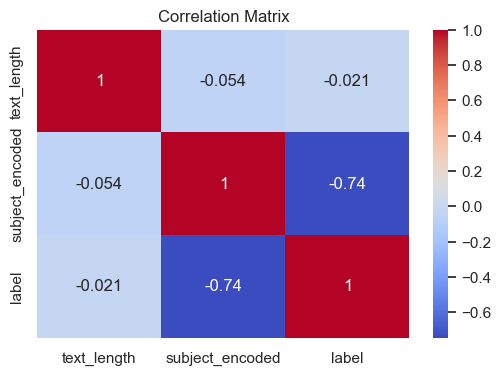

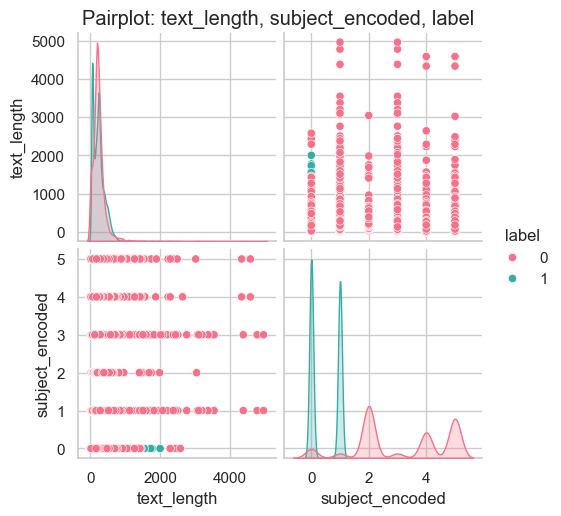

C:\Users\manikandanarayanan\AppData\Local\Temp\ipykernel_21948\1092218155.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='subject', y='text_length', hue='label', data=df, ci=None)


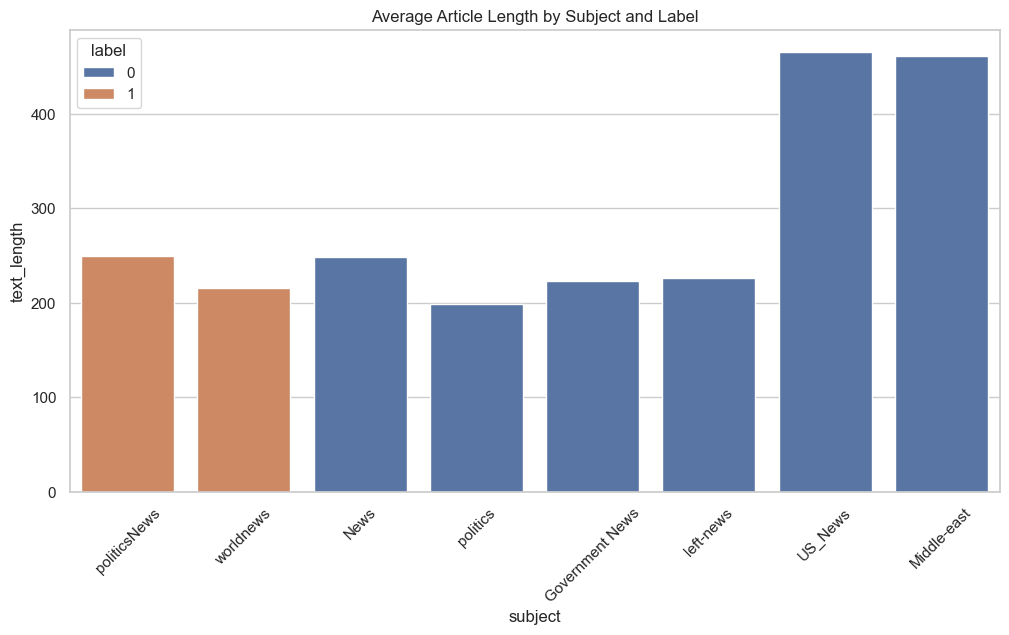

In [8]:
#Bivariate Analysis
# 1. Correlation Matrix
correlation = df[['text_length', 'subject_encoded', 'label']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 2. Pairplot (limited for speed)
sns.pairplot(df[['text_length', 'subject_encoded', 'label']], hue='label', palette='husl')
plt.suptitle("Pairplot: text_length, subject_encoded, label", y=1.02)
plt.show()

# 3. Grouped Bar Plot: Mean article length by subject and label
plt.figure(figsize=(12,6))
sns.barplot(x='subject', y='text_length', hue='label', data=df, ci=None)
plt.title("Average Article Length by Subject and Label")
plt.xticks(rotation=45)
plt.show()
